In [1]:
import pandas as pd
from dotenv import load_dotenv
import geopandas as gpd
import matplotlib.pyplot as plt
from operator import itemgetter

load_dotenv()

True

In [2]:
# map_data = gpd.read_file("file.geojson")
zip_map = gpd.read_file("fl_florida_zip_codes_geo.min.json")
zip_codes = pd.read_csv("zip_code_database.csv")
neighborhood_map = gpd.read_file("Miami_Neighborhoods_Shapefile (1).geojson")
csv = pd.read_csv("miami-housing.csv")

In [3]:
zip_codes = zip_codes[["primary_city", "state", "county", "timezone", "area_codes", "country", "zip"]]
zip_codes["county, state"] = zip_codes["county"] + ", " + zip_codes["state"]
zip_map["ZCTA5CE10"] = zip_map["ZCTA5CE10"].astype(int)
zip_map["INTPTLON10"] = zip_map["INTPTLON10"].astype(float)
zip_map["INTPTLAT10"] = zip_map["INTPTLAT10"].astype(float)
zip_map = zip_map.merge(zip_codes, how="left", left_on="ZCTA5CE10", right_on="zip")
zip_map = zip_map.drop(columns=zip_map.columns[zip_map.nunique()==1], index=0)
zip_map = zip_map.dropna(axis=1)
zip_map = zip_map.drop(columns=["ZCTA5CE10"])
zip_map["zip"] = zip_map["zip"].astype(str)


In [4]:
zip_map = zip_map[zip_map["primary_city"]=="Miami"]
neighborhood_map = neighborhood_map.drop(columns=(["Shape__Length", "Shape__Area"]), axis=1)

bounds = neighborhood_map.geometry.apply(lambda x: x.bounds).tolist()
minx_neighborhoods, miny_neighborhoods, maxx_neighborhoods, maxy_neighborhoods = min(bounds, key=itemgetter(0))[0], min(bounds, key=itemgetter(1))[1], max(bounds, key=itemgetter(2))[2], max(bounds, key=itemgetter(3))[3]

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))


zip_map.plot(ax=ax, color="white", edgecolor="black")
plt.scatter(csv["LONGITUDE"], csv["LATITUDE"], marker='.', color="red")
ax.scatter(zip_map["INTPTLON10"], zip_map["INTPTLAT10"], marker='o', color="green")

In [ ]:


fig, ax = plt.subplots(figsize=(20,5))
# zip_map.plot(ax=ax, )

neighborhood_map.plot(ax=ax, color="white", edgecolor="black")
plt.scatter(csv["LONGITUDE"], csv["LATITUDE"], c= csv["WATER_DIST"], marker='.', alpha=0.9)


In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
zip_map.plot(color="gray", edgecolor="green", ax=ax)
neighborhood_map.plot(color="white", edgecolor="black", ax=ax)


In [10]:
max_latitude = maxy_neighborhoods #25.75
max_longitude = maxx_neighborhoods #-80.1
min_latitude =  miny_neighborhoods #25.62
min_longitude =  minx_neighborhoods #-80.35

csv = csv[(csv["LATITUDE"]<max_latitude)&(csv["LATITUDE"]>min_latitude)&(csv["LONGITUDE"]<max_longitude)&(csv["LONGITUDE"]>min_longitude)]


C:\Users\jgonzalezt\AppData\Local\Temp\ipykernel_29248\3359463069.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_state = csv.groupby("state").mean()


<BarContainer object of 5 artists>

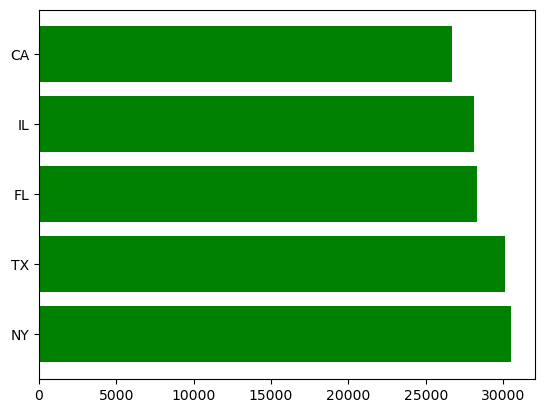

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv("car_prices.csv")
csv = csv[(csv["year"]>=2015)]
by_state = csv.groupby("state").mean()
by_state["count"] = csv.groupby("state").count()["price"]
by_state = by_state.sort_values(by="price", ascending=False)
plt.barh(
  by_state.index,
  by_state["price"].values,
  color="green",
)

C:\Users\jgonzalezt\AppData\Local\Temp\ipykernel_29248\1033852788.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_brand = csv.groupby("make").mean()


<BarContainer object of 5 artists>

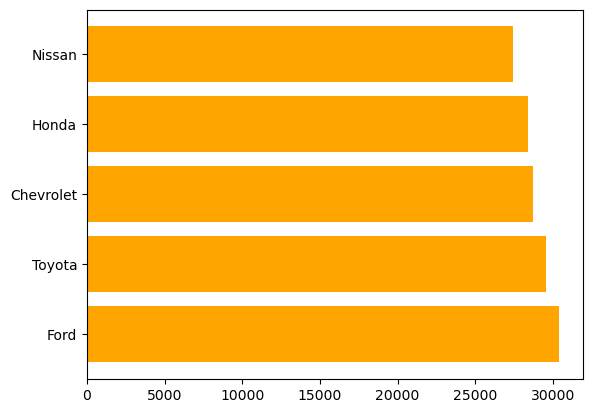

In [6]:
by_brand = csv.groupby("make").mean()
by_brand["count"] = csv.groupby("make").count()["price"]
by_brand = by_brand.sort_values(by="price", ascending=False)
plt.barh(
  by_brand.index,
  by_brand["price"].values,
  color="orange",
)


In [138]:
csv

,make,model,year,mileage,price,color,state,date
0,Chevrolet,Cruze,2011,99157,37488,white,TX,2023-09-26 23:02:01.647970
1,Toyota,Cruze,2017,19882,34176,red,IL,2023-08-08 23:02:01.648413
2,Chevrolet,Altima,2011,77718,40297,blue,CA,2023-02-25 23:02:01.648422
3,Nissan,Fusion,2012,83613,43492,silver,TX,2023-04-25 23:02:01.648425
4,Ford,Cruze,2016,95349,26655,red,NY,2023-12-14 23:02:01.648426
...,...,...,...,...,...,...,...,...
9995,Honda,Altima,2017,25154,43139,red,FL,2023-10-07 23:02:01.650165
9996,Chevrolet,Accord,2017,68264,15632,white,TX,2024-01-05 23:02:01.650166
9997,Nissan,Cruze,2016,17417,30832,silver,IL,2023-03-29 23:02:01.650168
9998,Honda,Accord,2011,68878,10801,blue,TX,2023-05-02 23:02:01.650170


In [5]:
import seaborn as sns
from ipywidgets import interact
from IPython.display import clear_output
import pandas as pd
import matplotlib.ticker as mtick

csv = pd.read_csv("car_prices.csv")

@interact
def barplot(x = csv.drop(["make", "mileage", "price"], axis=1).columns, y = csv[["mileage", "price"]].columns):
  clear_output(wait=True)
  df = csv.groupby(["make", x]).sum(["price", "mileage"])
  df.reset_index(inplace=True)
  df = df.pivot(index="make", columns=x, values=y)
  ax = df.plot(kind="bar", stacked=True, figsize=(10, 5), colormap="cividis")
  ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f"{x:.0f}"))
  plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
  plt.show()



interactive(children=(Dropdown(description='x', options=('model', 'year', 'color', 'state', 'date'), value='mo…

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Texto de ejemplo
texto = " ".join([mod for mod in csv["model"]])

# Crear un objeto WordCloud
word_cloud = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="salmon",
        colormap="Pastel1",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(text=texto)


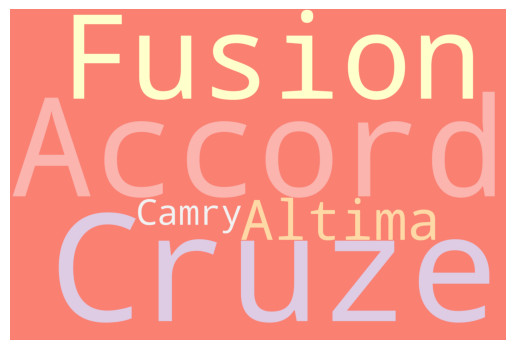

In [7]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()